<h1><font color = 'red'><b>MILESTONE PROJECT- 01</b></font><h1>

**Real Life Problems**

**What is structured data?**

* feature_variables and target_variables are known to us
* we know and can predict the pattern that are present in the data set given to us

<img src = "supervised-projects-6-step-ml-framework-tools-highlight.png">

<img src = "ml101-steps-to-take-in-a-machine-learning-project.png">

# Predicting heart disease using ML

**This notebook look into various python based machine learning and data science libraries in an attempt to
build a machine learning project or model capable of capable of predicting whether or not someone has heart
disease based on their medical attributes**

Lets look at the steps we need to follow for creating the same :

1. Problem definition
2. Data
3. Evaluation
4. Features 
5. Modelling
6. Experimentation


# 1. Problem Definition:

> Given clinical parameter whether we can predict they have heart diease or not<br>
https://www.kaggle.com/ronitf/heart-disease-uci

***Data specification:***
Columns
* ageage in years
* sex(1 = male; 0 = female)
* cpchest pain type
* trestbpsresting blood pressure (in mm Hg on admission to the hospital)
* cholserum cholestoral in mg/dl
* fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecgresting electrocardiographic results
* thalachmaximum heart rate achieved
* exangexercise induced angina (1 = yes; 0 = no)
* oldpeakST depression induced by exercise relative to rest
* slopethe slope of the peak exercise ST segment
* canumber of major vessels (0-3) colored by flourosopy
* thal3 = normal; 6 = fixed defect; 7 = reversable defect
* target1 or 0

# 2. Data

https://www.kaggle.com/ronitf/heart-disease-uci

# 3. Evaluation

> if we can reach 95% acc in predicting whether or not a person has heart disease or not then we can further
pursue it

# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## preparing the tools

we' re going to use pandas a, matplotlib, numpy for data analysis and manipulation

In [1]:
## Import all the tools that we need to work upon

## regular EDA (Exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## import all the ones needed from the sklearn estimator map
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Evaluate all that is needed to evaluate the model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
#from sklearn.metrics import plot_roc_curve   #-----> we dont have it
##from sklearn.compose import ColumnTransformer  ##----- if we require to convert and fill numeric data
##from sklearn.preprocessing import OneHotEncoder

In [2]:
## Exploring our Data
# load data
df = pd.read_csv('heart-disease.csv')
df.head()
df.shape

(303, 14)

## EDA ----> Exploratory data analysis
become a subject matter expert by finding more about the data
1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat differet datatypes?
3. What's missing in the data and how to deal with it?
4. Where are the outliers and why should you care care about them ?
5. How can you add change or remove to get more out of ur data?


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

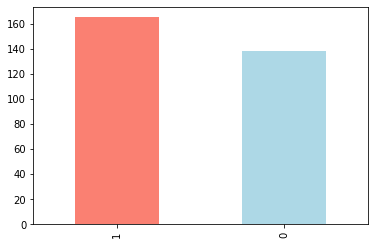

In [6]:
df['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
# check whether there are any missing values or not?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Finding Patterns 01

## Compare different columns now 

**Heart Disease frequency accordding to sex**

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(df['sex'], df['target'])## compare the sex and heart disease
## we infere that 72 out of 96 women are having heart disease
## we infere that 93 out of 207 men are having heart disease 
## hence we can say that more percentage of women are suffering from a heart disease

target,0,1
sex,,
0,24,72
1,114,93


(array([0, 1]), <a list of 2 Text yticklabel objects>)

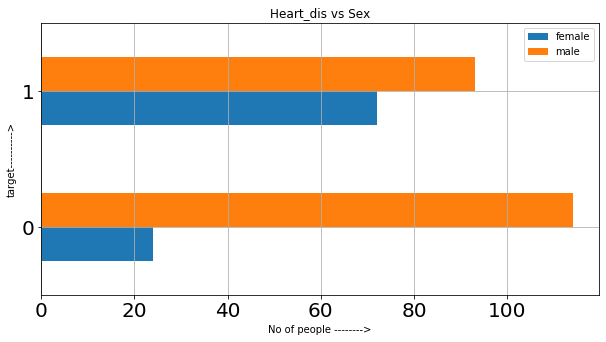

In [12]:
# create a plot of cross tab
pd.crosstab(df['target'], df['sex']).plot(kind = 'barh', figsize = (10,5), title = 'Heart_dis vs Sex',
                                         fontsize = 20, grid = True)
plt.xlabel('No of people -------->')
plt.ylabel('target---------->')
plt.legend(['female', 'male'])
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)


**Usually we try and compare target variable with other variables or features**

# Finding Patterns 2

In [13]:
df['thalach'].value_counts()
# Since this is quite a bit of info that we have we cannot use a bargraph to visualise this
# hence a better choice can be histogram

162    11
160     9
163     9
173     8
152     8
125     7
132     7
150     7
172     7
143     7
144     7
156     6
169     6
158     6
140     6
142     6
178     5
161     5
154     5
165     5
168     5
174     5
170     5
182     5
179     5
157     5
147     5
145     4
131     4
130     4
       ..
181     2
180     2
106     1
97      1
99      1
113     1
95      1
90      1
88      1
117     1
202     1
118     1
177     1
194     1
192     1
190     1
188     1
187     1
185     1
184     1
167     1
121     1
195     1
137     1
134     1
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

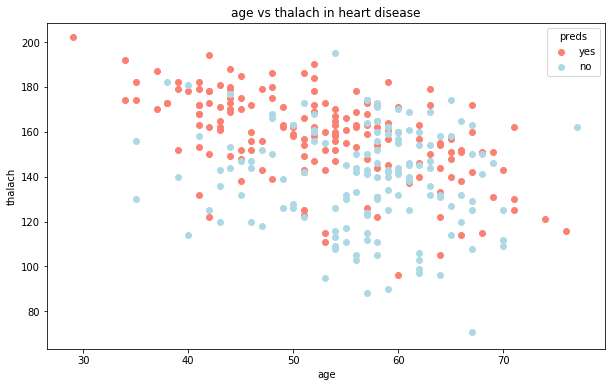

In [14]:
### age vs thalach in heart disease
plt.figure(figsize = (10,6))

# Scatter with the positive examples
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c = 'salmon');
plt.xlabel('age')
plt.ylabel('thalach')
plt.title('age vs thalach in heart disease')

## scatter with negative
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c = 'lightblue');
plt.xlabel('age')
plt.ylabel('thalach')
plt.title('age vs thalach in heart disease')
plt.legend(['yes', 'no'], title = 'preds');

## Add some helpful info 
## But its generally difficult to predict anything

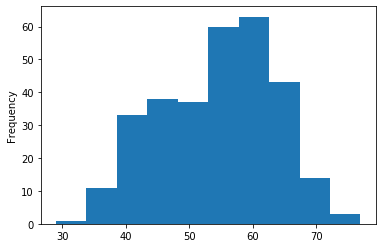

In [15]:
# Distribution of the age column with a histogram
df.age.plot.hist();
# its a noraml distribution

**How to tell that there are outliers and we can improve our analysis by removing the outliers**

In [16]:
## Now we can compare cp--Chest pain type to the target column 
## Heart frequency per chest type
'''
cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
'''
## We could do it easily by using cross_tab
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


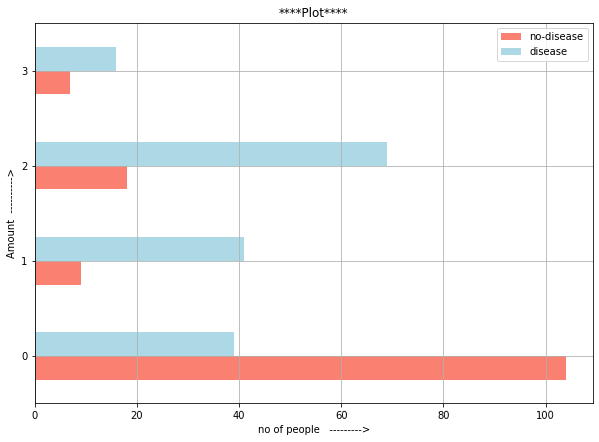

In [17]:
## Make the cross tab more visual
pd.crosstab(df['cp'], df['target']).plot(kind = 'barh', figsize = (10,7), color = ['salmon', 'lightblue'],grid = True)
plt.legend(['no-disease', 'disease'])
plt.xlabel('no of people   --------->')
plt.ylabel('Amount  ---------->')
plt.title('****Plot****')
plt.xticks(rotation = 1);

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


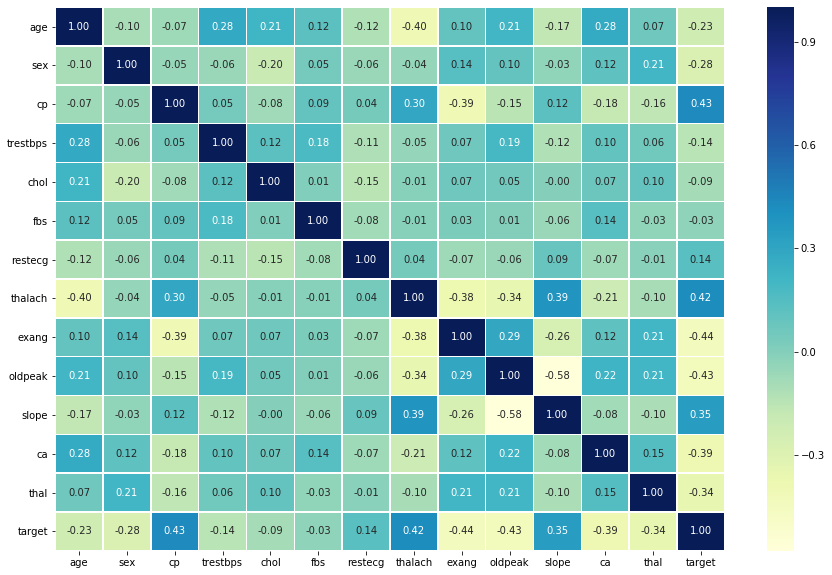

In [19]:
'''
Coorelation Matrix
'''
# Make a Correlation Matrix
col_mat = df.corr()
# This actually behave a pair-plot
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(col_mat, annot = True, cmap = 'YlGnBu', ax = ax, linewidth = 0.5, fmt = '.2f');
### A very imp syntax for adjusting the axes
'''
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
'''
'''
What happens here is that 
A higher increasing positive value means a potential positive correlation value
A higher increasing negative value means a potential negative correlation value
say, as cp goes up the target value increase acc to data even at last the ratio almost remains same
say, as exang goes up the target value decrease 
so**** negative correlation = a relationship between two variables in which one variable increases as the 
other decreases....

This means, in this case , strangely enough , according to the correlation value here, if someone gets 
chest pain during exercise (exang = 1), their chance of having heart disease goes down (target = 0)
''';

<a href = 'https://www.displayr.com/what-is-a-correlation-matrix/'>click here to read about coorelation matrix</a>

## Preparing our data for Machine Learning

## 5.Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Split into X and y
X = df.drop('target', axis = 1)
y = df.target

In [22]:
# Split into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [24]:
len(y_train)

242

In [25]:
## Build a machine learning model
## We ll train it and then test it.
'''
Let's use the KNeighborsClassifier ( K nearest neighbors)
and RandomForestClassifier
and LogisticRegression

we are gonna try 3 of them
'''

"\nLet's use the KNeighborsClassifier ( K nearest neighbors)\nand RandomForestClassifier\nand LogisticRegression\n\nwe are gonna try 3 of them\n"

In [26]:
# put models in a dictionary
models = {'rfc': RandomForestClassifier(),
          'lr': LogisticRegression(),
          'knn': KNeighborsClassifier()}
## Create the function to fit and score models:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and Evaluates given machine learning models,
    models: a dict of different Scikit Learn Machine Learning Models
    X_train : training data (no labels)
    X_test : test data (no labels)
    y_train : tarining labels
    y_test : test labels.
    '''
    #Set Random Seed
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_scores = {}
    # Loop to have our model fit
    for model_name, model in models.items():
        # Fit the model now
        model.fit(X_train, y_train)
        # Evaluate the model and fit the same to model_score
        model_scores[model_name] = model.score(X_test, y_test) # This way we actuall append the valueto key
        
    return model_scores
        

In [27]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
print(model_scores)
'''
What we are getting is the baseline model
baseline scores
'''

{'rfc': 0.8524590163934426, 'lr': 0.8688524590163934, 'knn': 0.6885245901639344}


C:\Users\Himanshu Mohanty\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Himanshu Mohanty\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


'\nWhat we are getting is the baseline model\nbaseline scores\n'

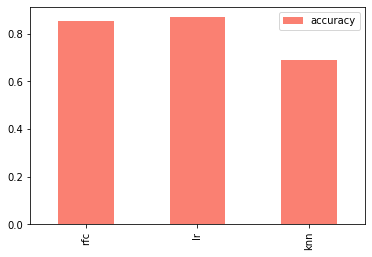

In [28]:
## Model Comparison
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.bar( color = ['salmon'])

In [29]:
'''
Now that we have the baseline model now we can go for some evaluation and hyper-parameter tuning
* Hyper-parameter tuning
* Feature Importance
* Confusion Matrix
* Classification report
* Precision score
* f1 score
* recall score
* ROC curve
* Area under the curve (AUC)
* Cross validation cum scoring parameter
'''

'\nNow that we have the baseline model now we can go for some evaluation and hyper-parameter tuning\n* Hyper-parameter tuning\n* Feature Importance\n* Confusion Matrix\n* Classification report\n* Precision score\n* f1 score\n* recall score\n* ROC curve\n* Area under the curve (AUC)\n* Cross validation cum scoring parameter\n'

In [30]:
# Hyper parameter Tuning in all of these models
## lets tune KNN

train_scores = []
test_scores = []

# Create a list of different values of n_neighbors
neighbors = range(1, 21)

# Set up the KNN
knn = KNeighborsClassifier()

#Loop through the n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training score list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test score list
    test_scores.append(knn.score(X_test, y_test))
    
print('train_scores = ',train_scores,'\n\n' ,'test_scores = ', test_scores)

train_scores =  [1.0, 0.8099173553719008, 0.7727272727272727, 0.743801652892562, 0.7603305785123967, 0.7520661157024794, 0.743801652892562, 0.7231404958677686, 0.71900826446281, 0.6942148760330579, 0.7272727272727273, 0.6983471074380165, 0.6900826446280992, 0.6942148760330579, 0.6859504132231405, 0.6735537190082644, 0.6859504132231405, 0.6652892561983471, 0.6818181818181818, 0.6694214876033058] 

 test_scores =  [0.6229508196721312, 0.639344262295082, 0.6557377049180327, 0.6721311475409836, 0.6885245901639344, 0.7213114754098361, 0.7049180327868853, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.7540983606557377, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.6885245901639344, 0.7213114754098361, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.6557377049180327]


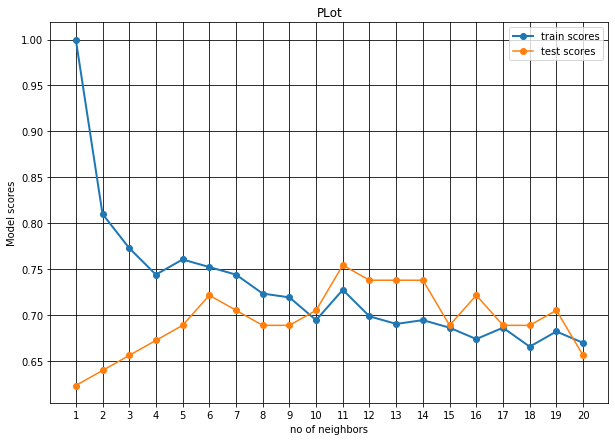

In [69]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.grid( color = 'black')
plt.plot(neighbors, train_scores, label = "train scores", marker = "o", linewidth = 2)
plt.plot(neighbors, test_scores, label = 'test scores',  marker = 'o', linewidth = 1.5)
plt.xlabel('no of neighbors')
plt.ylabel('Model scores')
plt.legend(['train scores', 'test scores'])
plt.title('PLot')
plt.xticks(np.arange(1,21,1));


In [32]:
## Even with hyper parameter tuning it did not come out well hence we discard the knn model

In [33]:
# Lets try and tune the Logistics Regression and RandomForestClassifier
# This time we do it RandomizedSearchCV and GridSearchCV

In [34]:
# create a hyperparameter grid for Logistic Regression and forests
log_reg_grid = {'C': np.logspace(-4,4,20),
                'solver': ['liblinear']}
# Create a hyperparameter for RandomForestClassifier
rf_grid = {'n_estimators' : np.arange(10, 1000, 50),
           'max_depth' : [None, 3, 5, 10],
           'min_samples_split': np.arange(2,20, 2),
           'min_samples_leaf':np.arange(1, 20, 2)}

In [35]:
# create the randomcv for logistic regression 
# random seed
np.random.seed(42)

#Setup the hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(estimator = LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                verbose = True,
                                n_iter = 20)
#Fit the model now
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
C:\Users\Himanshu Mohanty\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [37]:
rs_log_reg.score(X_test, y_test)
#Though we have improved the score but still its not enough

0.8852459016393442

In [38]:
## Lets tune the randomforest model now
# create the randomcv 
# random seed
np.random.seed(42)

#Setup the hyperparameter search for logistic regression
rs_rf = RandomizedSearchCV(estimator = RandomForestClassifier(),
                                param_distributions = rf_grid,
                                cv = 5,
                                verbose = True,
                                n_iter = 20)
#Fit the model now
rs_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
C:\Users\Himanshu Mohanty\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [39]:
# lets get the best params
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [40]:
# lets check the score now
rs_rf.score(X_test, y_test)

0.8688524590163934

In [41]:
# still the default one is better
# Hence we need to tune again and again
# we can use grid search now
# that can be a option though

# GridSearchCV

In [42]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ['liblinear']}

## lets set up the same for Logistic Regression
gs_log_reg = GridSearchCV(estimator = LogisticRegression(),
                       param_grid = log_reg_grid,
                       cv = 5,
                       verbose = True)
# Fit the same now
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished
C:\Users\Himanshu Mohanty\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.0000000...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.

In [43]:
# check the best params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [44]:
# check the score now
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [45]:
'''
# Now lets do the same for random forest
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_leaf': arange(2, 20, 2),
           'min_samples_split': arange()}
''';

In [46]:
## Evaluating our tuned machine learning classifier, beyond accuracy
'''
* ROC curve and AUC
* Confusion Matrix
* Classification Report
* Precision score
* f1 score
* Recall score
And it would be great if we use cross validation wherever possible
''';

In [47]:
# First Make prediction
y_preds = gs_log_reg.predict(X_test)

In [48]:
y_preds
# Since we do not have the plot_roc_curve function we ll do it using predict proba
y_preds_prob = gs_log_reg.predict_proba(X_test)
y_preds_prob
y_preds_prob_pos = y_preds_prob[:, 1]

In [49]:
## ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_preds_prob_pos)

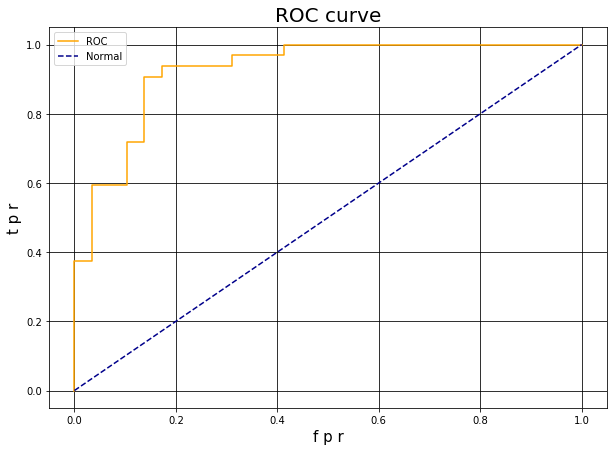

In [70]:
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(fpr, tpr, color = 'orange')
ax.plot([0,1], [0, 1], color = 'darkblue', linestyle = '--')
plt.ylabel('t p r', fontsize = 15)
plt.xlabel('f p r', fontsize = 15)
plt.grid(color = 'black')
plt.title('ROC curve', fontsize = 20)
plt.legend(['ROC', 'Normal'])


In [51]:
roc_auc_score(y_test, y_preds_prob_pos)

0.925646551724138

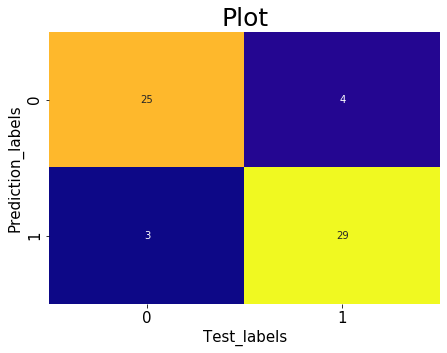

In [71]:
# Confusion Matrix
conf = confusion_matrix(y_test, y_preds)
conf
fig, ax = plt.subplots(figsize = (7, 5))
sns.heatmap(conf, annot = True, cmap = 'plasma', cbar = False)
plt.xlabel('Test_labels', fontsize = 15)
plt.ylabel('Prediction_labels', fontsize = 15)
plt.xticks( fontsize = 15)
plt.yticks( fontsize = 15)
plt.title('Plot', fontsize = 25)
'''
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
''';

In [53]:
## Possible Colour maps
'''
Colormap BlRd is not recognized. Possible values are:
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r,
CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r,
OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r,
Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd
, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r,
RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral,
Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r,
afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis,
cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r,
gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r,
gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2
, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r,
jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r,
plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring,
spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain,
terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r,
winter, winter_r
''';

In [54]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [55]:
# Classification Report
print(classification_report(y_test, y_preds))

'''
# We need to do it by cross validation
# Precision determines the measure of positive identification
# A model which predicts positive results which actually is correct has a high precision
# A model which has no false positive is said to be having a precision of 1 ....
# A model which predicts no false negative is said to be having a recall of 1...
# f1 is a combination of precision and recall
'''

cv_precision = cross_val_score(LogisticRegression(C = 0.20433597178569418,
                                                  solver = 'liblinear'), X, y,
                                                  scoring = 'precision', cv = 5)
cv_recall = cross_val_score(LogisticRegression(C = 0.20433597178569418,
                                               solver = 'liblinear'), X, y,
                                               scoring = 'recall', cv = 5)
cv_f1 = cross_val_score(LogisticRegression(C = 0.20433597178569418,
                                           solver = 'liblinear'), X, y,
                                           scoring = 'f1', cv = 5)
print(f'cv_precision : {cv_precision.mean()}\ncv_recall : {cv_recall.mean()}\ncv_f1 : {cv_f1.mean()}')

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

cv_precision : 0.8207936507936507
cv_recall : 0.9212121212121213
cv_f1 : 0.8673007976269721


Text(0.5, 1.0, 'CROSS_VALIDATED_SCORES')

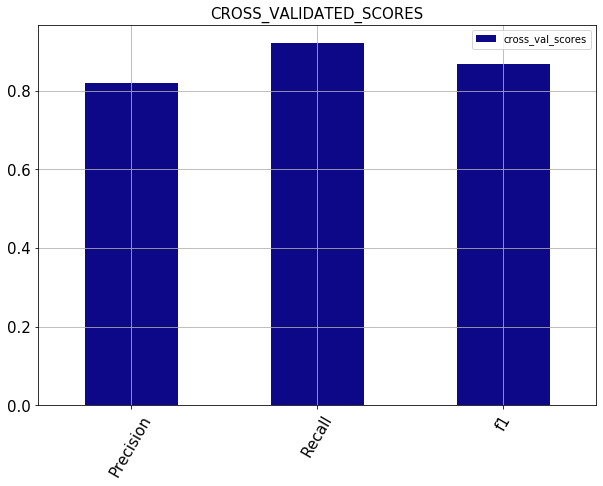

In [72]:
# But the thing is that if we use this kind of a function then this will only asses a single test set.
# and not all the test set
cv_metrics = pd.DataFrame({'Precision': cv_precision.mean(),
                           'Recall': cv_recall.mean(),
                           'f1': cv_f1.mean()}, index = ['cross_val_scores'])
cv_metrics.T.plot.bar(grid = True, figsize = (10, 7), cmap = 'plasma')
plt.xticks( fontsize = 15, rotation = 60)
plt.yticks( fontsize = 15)
plt.title('CROSS_VALIDATED_SCORES', fontsize = 15)


In [57]:
'''
Feature Importance:
Feature importance is another way of asking which contributed mostly towards predicting the outcomes of 
the model.
Finding feature importance is different for each of the models ,
check the internet--> 

Let's find the feature importance of our Logistics Regression
''';

In [58]:
# Fit an instance of logistic regression
gs_log_reg.best_params_

clf = LogisticRegression(C = 0.20433597178569418, solver = 'liblinear')
clf.fit(X_train, y_train);

In [59]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [60]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
# Match the coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict
# its acttually mapped the objects
# it took the columns and the mapped the same the each of the array elements step by step

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

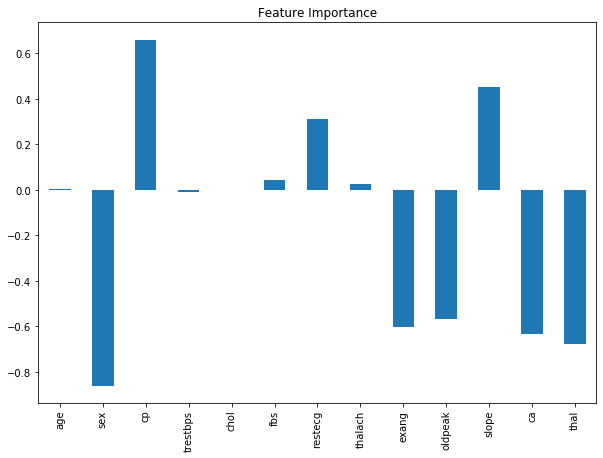

In [62]:
# Visulaize the feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = 'Feature Importance', legend = False, figsize = (10,7))

In [63]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [64]:
'''
Here sex is highly negative correlated 
That mean as sex increases then the target goes down this means that 
the ratio between the target and sex is what we are concerned with  3:1 ratio
see---> at first when the ratio between the sex and target is more 3:1
But when as the sex goes up the ratio between the target and sex goes drastically down
Hence we see there is a high negative correlation
we can see this through cross_tab function
'''

'\nHere sex is highly negative correlated \nThat mean as sex increases then the target goes down this means that \nthe ratio between the target and sex is what we are concerned with  3:1 ratio\nsee---> at first when the ratio between the sex and target is more 3:1\nBut when as the sex goes up the ratio between the target and sex goes drastically down\nHence we see there is a high negative correlation\nwe can see this through cross_tab function\n'

In [65]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [66]:
'''
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
'''
'''
say now we see the slope and target
as slope is showing a positive correlation
so inference 
hence we can say that
as slope increases the ratio between the target and the slope also increases
''';

In [67]:
'''
Hence we should be aware of the features 
sometimes what we need to know the features very well and for this we may also consult a subject expert
for this...
this is because
some feature actually deteriorate the model prediction ability
''';

# 6. Experimentation

In [68]:
'''
Search for different ways beacuse ml is about experimentation
* Could u collect more data ?
* Could u try a better model ? Like CatBoost or XGBoost
* Could we improve the model further more ?
* all about to know is that nothing is structured ?
* If your model is good enough ( you have hit your evaluation metric)
how would you export it and share it with others ?
''';

# If u cannot COMMUNICATE AND EXPERIMENT 
# ML IS NOT FOR U